## PCA: Labeled Faces in the Wild (LFW) dataset

We will apply PCA to the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) dataset, which consists of face photographs designed for studying the problem of unconstrained face recognition. The original dataset contains more than 13,000 images of faces collected from the web. We will use a small sample of this, which is available in `sklearn`.

In [1]:
# load libraries and set plot parameters
import numpy as np
import prettytable as pt

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from time import time

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("\tnumber of samples: %d" % n_samples)
print("\tnumber of features: %d" % n_features)
print("\tnumber of classes: %d" % n_classes)

Total dataset size:
	number of samples: 1288
	number of features: 1850
	number of classes: 7


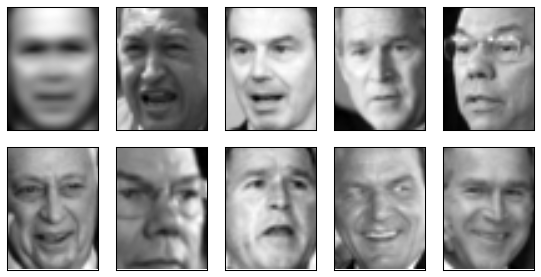

In [3]:
def plot_faces(images, n_row=2, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
    plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
    

Xmean = np.mean(X,axis=0).reshape(1,n_features) # average face
#plot the average face and some samples from the dataset
plot_faces(np.concatenate((Xmean,X[:9]),axis=0))

Split into a training set and a test set using a stratified $k$-fold.

In [4]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

Extracting the top 60 eigenfaces from 966 faces
done in 2.741s


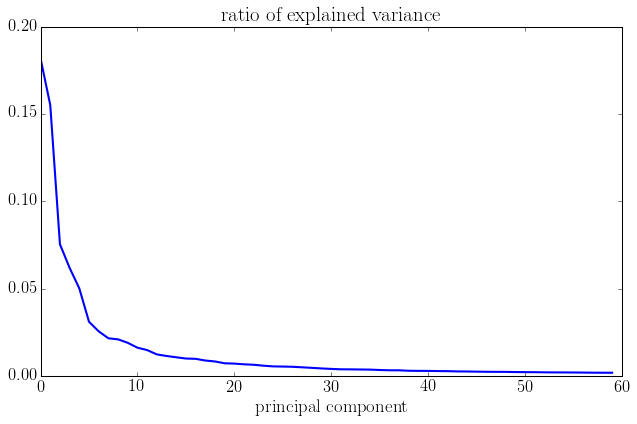

In [5]:
n_components = 60

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized').fit(X_train)
print("done in %0.3fs" % (time() - t0))

f,ax = plt.subplots()
plt.plot(pca.explained_variance_ratio_)
plt.title("ratio of explained variance")
ax.set_xlabel("principal component")
plt.show()

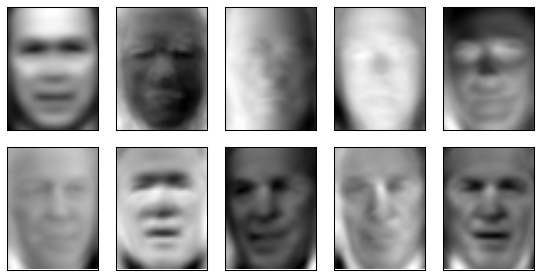

In [6]:
eigenfaces = pca.components_
#plot the average face and top eigenfaces
plot_faces(np.concatenate((Xmean,eigenfaces[:10]),axis=0))

In [7]:
Xmean = pca.mean_.reshape(1,n_features)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.107s


Projections to the principal components (obtained via `pca.transform`) can be viewed as a compression of the original images. To see the images which can be recovered from this compression, use `pca.inverse_transform`. 

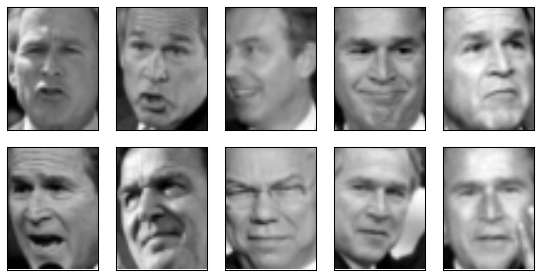

In [8]:
#original faces
plot_faces(X_test[:10])

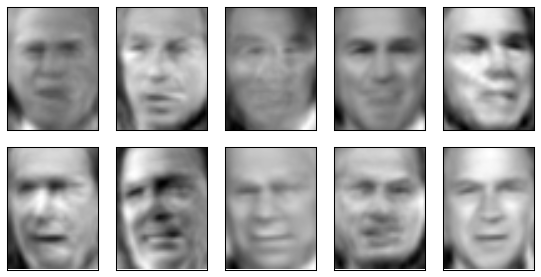

In [9]:
#reconstructed faces
X_test_rec = pca.inverse_transform(X_test_pca)
plot_faces(X_test_rec[:10])